In [121]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random 

plt.style.use(['science', 'retro', 'grid'])

import sys
import cvxopt as opt
sys.path.insert(0, os.path.abspath('../../src/rl/gaussian/'))
sys.path.insert(1, os.path.abspath('../../src/rl/environments/'))
sys.path.insert(1, os.path.abspath('../../src/rl/environments/base'))
sys.path.insert(2, os.path.abspath('../../src/mpt/efficient_frontier/'))
sys.path.insert(3, os.path.abspath('../../src/mpt/utils'))

In [277]:
import importlib
importlib.reload(sys.modules['EfficientFrontier'])
importlib.reload(sys.modules['GenerativeMarketEnv'])
importlib.reload(sys.modules['Harness'])
importlib.reload(sys.modules['ParallelRunner'])
importlib.reload(sys.modules['GaussianPolicy'])

<module 'GaussianPolicy' from '/Users/michael/UCL/Disertation/porfolio-optimisation/src/rl/gaussian/GaussianPolicy.py'>

In [278]:
from GenerativeMarketEnv import GenerativeMarketEnv
from GaussianPolicy import GaussianPolicy
from Harness import Harness
from ParallelRunner import ParallelRunner
from EfficientFrontier import EfficientFrontier
from MarketFactory import MarketFactory

In [230]:
market = GenerativeMarketEnv(np.array([1, 3, 1.15]), np.diag([.1, .1, .09]))

In [88]:
policy = GaussianPolicy(3, α_μ=1e-3, α_σ=1e-18, γ=0.1)
harness = Harness(market, policy, episode_length=50, reward_mode='returns', η=0.05, obs_period=1)

In [89]:
harness.train(2000)

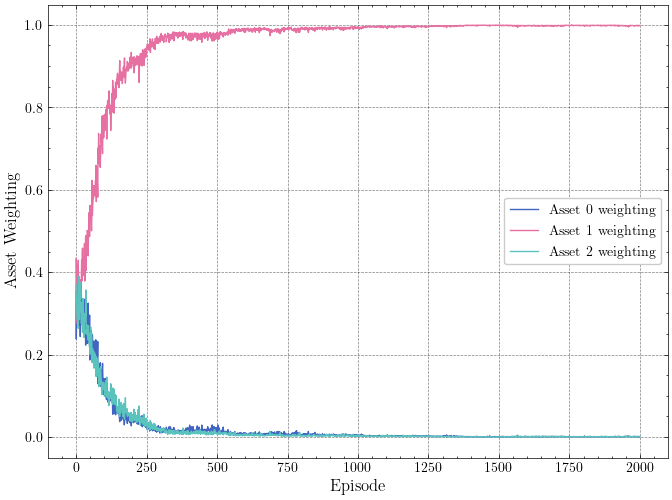

In [90]:
harness.plot_weights_vs_ep()
plt.savefig('./gaussian_policy_simple_run_weights')

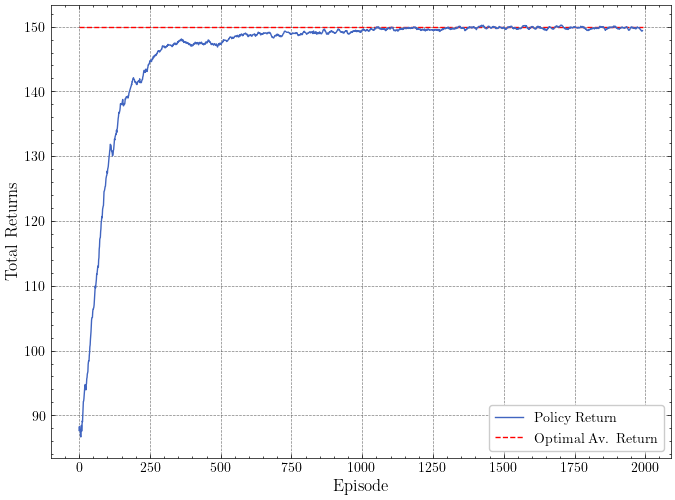

In [91]:
harness.plot_smooth_rewards(2000)
plt.savefig('./gaussian_policy_simple_run_returns')

In [279]:
params = {
    'n_assets': 3,
    'α_μ': 1e-3,
    'α_σ': 1e-18,
    'γ': 0.1,
    'eps': 1000
}

market = GenerativeMarketEnv(np.array([1, 3, 1]), np.diag([.1, .1, .1]))
p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run()

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 60.24it/s]
1it [00:06,  6.72s/it]


(10, 1000)


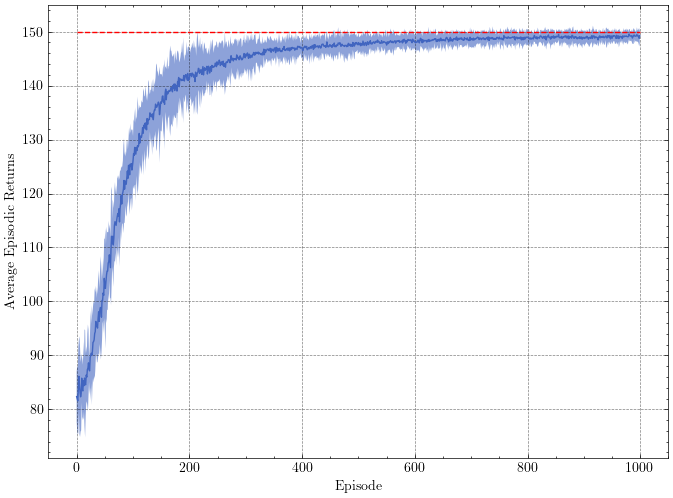

In [282]:
p_runner.plot_av_rewards()
plt.savefig('./gaus_rewards_simple')

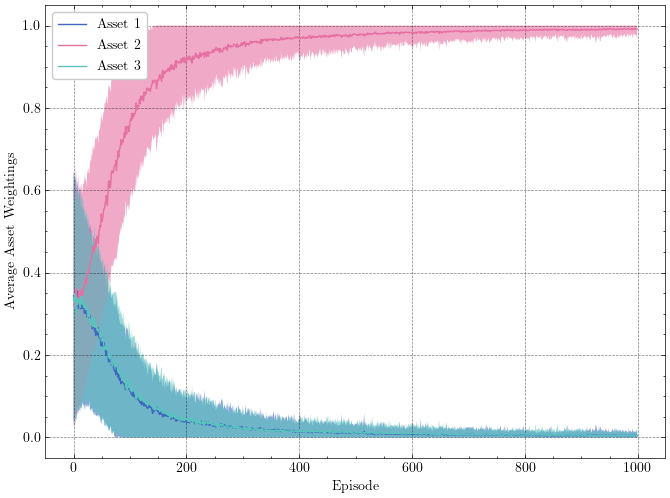

In [283]:
p_runner.plot_av_weights()
plt.savefig('./gaus_weights_simple')

In [22]:
params = {
    'n_assets': 3,
    'α_μ': 1e-3,
    'α_σ': 1e-18,
    'γ': 0.1,
    'eps': 2000
}

market = GenerativeMarketEnv(np.array([1, 3, 1.15]), np.diag([.1, .1, .09]))
p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 3776.27it/s]
1it [00:06,  6.31s/it]


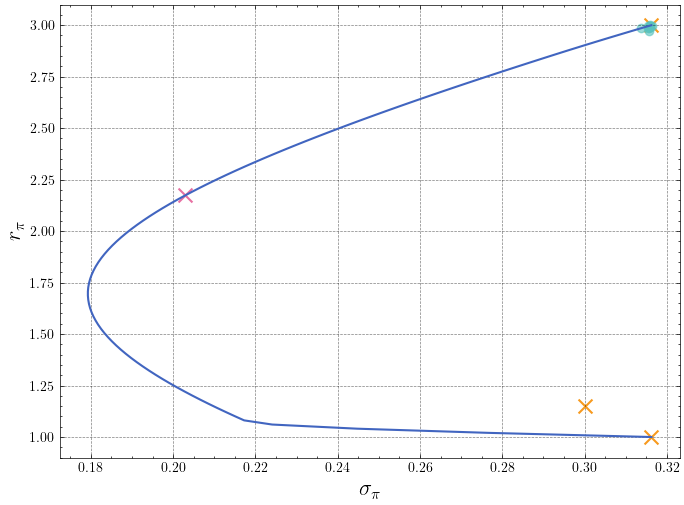

10.709549217607096

In [23]:
market.plot_efficient_frontier(stds = stds, returns = means)

In [84]:
params = {
    'n_assets': 3,
    'α_μ': 1e-4,
    'α_σ': 1e-10,
    'γ': 0.1,
    'eps': 2000
}

market = GenerativeMarketEnv(np.array([1, 3, 1.15]), np.diag([.1, .1, .09]))
p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 50, reward_mode='dsr')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 49.09it/s]
1it [00:13, 13.57s/it]


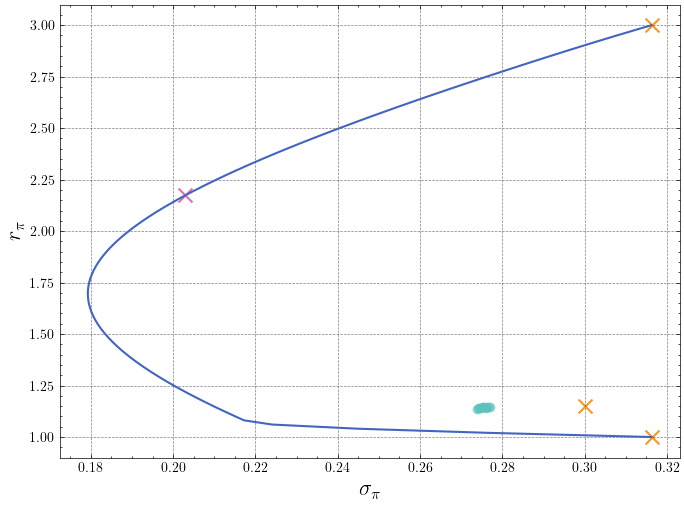

10.709549217607096

In [85]:
market.plot_efficient_frontier(stds = stds, returns = means)